In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_takes = pd.read_csv('../../Takes_Feb25.csv')
df_watch = pd.read_csv('../../Watch-Data_Feb25.csv')

In [3]:
df_intake = pd.read_csv('../../Intake-Surveys_Feb25.csv')
df_post = pd.read_csv('../../Post-Surveys_Feb25.csv')

In [4]:
df_takes.groupby('Cohort')
df_takes.groupby('Assignment')
df_takes = df_takes.dropna(subset=['Take Length'])

In [5]:
df_takes["BigOutliers"] = df_takes["Take Length"] > (85 + (1.5*(85-17)))

df_takes["BigOutliers"]

outlier_count = df_takes["BigOutliers"].sum()

outlier_count

425

In [6]:
#Brainstorm for Formula
#over mean - building leaderboard based on number of minutes for takes
#Could weigh the take time with how many instances of participant in watch
#could also use activity?
#Group means and over means based on assignment and cohort to avoid any disparities in data
df_takes["overmean"] = df_takes["Take Length"] > (63)
overMean = df_takes["overmean"].sum()
print(overMean) #3691 - now need to split by cohort

df_takes["Cohort"] = df_takes["Cohort"].astype(str)  # Ensure it's categorical
df_takes["Take Length"] = pd.to_numeric(df_takes["Take Length"], errors="coerce")  # Convert values to numbers
mean_by_cohort = df_takes.groupby("Cohort")["Take Length"].mean()
print(mean_by_cohort)

3691
Cohort
ALDE 2024                               77.673846
ALDE 2024 #2                            67.788122
BetterOn Going Custom                  100.100000
BetterOn Your Own                       33.145679
BetterOn for Interviews                 14.666667
CTO's '24-'25                           83.305263
Corporate Academy September '24         64.352518
DELD 2023                               71.609467
ELA 2023                                62.688312
Executive Presence Studio               70.947500
Executive Presence Studio - Feb '25     82.230769
February 2024                           60.115789
February/March 2025                     78.719512
Greenhouse Presence Bootcamp            68.663498
June 2024                               57.722928
June 2024 Pilot                         70.458564
New Recorder Cohort                     72.066667
RTP Authentic Presence Training        104.500000
Red Hat Cloud Partners Team             64.947743
Session 1                             

In [7]:
#View how many people outperform the mean take time for each cohort
df_takes["abovemean"] = df_takes.apply(lambda row: row["Take Length"] > mean_by_cohort[row["Cohort"]], axis=1)
df_takes["abovemean"] = df_takes["abovemean"].astype(int)
result_table = df_takes.groupby("Cohort", as_index=False)["abovemean"].sum()
result_table.columns = ["Category", "Instances_Above_Mean"]
result_table

,Category,Instances_Above_Mean
0,ALDE 2024,118
1,ALDE 2024 #2,267
2,BetterOn Going Custom,4
3,BetterOn Your Own,146
4,BetterOn for Interviews,2
5,CTO's '24-'25,33
6,Corporate Academy September '24,354
7,DELD 2023,134
8,ELA 2023,332
9,Executive Presence Studio,335


In [8]:
#Why watch so many NAs for activity? one thing could be finding the value of activity, highest cumulative
#score of take length, activity, and # of occurrences in watch? We could weigh those variables based on
#how critical each value is at representing engagement

names = df_watch["Participant"].unique()
len(names) #only 363 names for almost 7000 observations
participant_counts = df_watch["Participant"].value_counts()
print(participant_counts)

Participant
diego.rodrigues@automattic.com    74
chi-hsuan.huang@automattic.com    72
jirka.malina@automattic.com       66
seiji.hara@automattic.com         63
ariel.maidana@automattic.com      53
                                  ..
lrh030121@gmail.com                1
ab1043@duke.edu                    1
christian.pile365@gmail.com        1
natekzucker@gmail.com              1
rdesai@us.ibm.com                  1
Name: count, Length: 362, dtype: int64


In [9]:
# Define a mapping from text responses to numerical values
response_mapping = {
    "1 - Not so much.": 1,
    "2- Somewhat.": 2,
    "3 - Pretty familiar": 3,
    "4 - Absolutely!": 4
}

# Apply the mapping to the relevant columns
for column in df_post.columns:
    df_post[column] = df_post[column].map(response_mapping).fillna(df_post[column])

# Initialize a dictionary to store mean scores
mean_scores = {}

# Calculate the mean score for each question using a for loop
for column in df_post.columns:
    if df_post[column].dtype in ['int64', 'float64']:
        mean_scores[column] = df_post[column].mean()

# Display the mean scores in a simple table
mean_scores_table = pd.DataFrame(list(mean_scores.items()), columns=['Question', 'Mean Score'])
print(mean_scores_table)

                                            Question  Mean Score
0   It’s easy for me to get into the headspace I ...    3.201646
1            Recording video empowers me personally.    3.522634
2        Recording video empowers me professionally.    3.559671
3       I am familiar with the power of my presence.    3.555556
4  I can easily shift from my “on camera me” to m...    3.111732


/var/folders/1w/hq9s5gxs7gs8czfbrbsb7nqc0000gn/T/ipykernel_24845/1205565710.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_post[column] = df_post[column].map(response_mapping).fillna(df_post[column])


In [10]:
# Define a mapping from text responses to numerical values
response_mapping = {
    "1 - Not so much.": 1,
    "2- Somewhat.": 2,
    "3 - Pretty familiar": 3,
    "4 - Absolutely!": 4
}

# Apply the mapping to the relevant columns
for column in df_intake.columns:
    df_intake[column] = df_intake[column].map(response_mapping).fillna(df_intake[column])

# Initialize a dictionary to store mean scores
mean_scores = {}

# Calculate the mean score for each question using a for loop
for column in df_intake.columns:
    if df_intake[column].dtype in ['int64', 'float64']:
        mean_scores[column] = df_intake[column].mean()

# Display the mean scores in a simple table
mean_scores_table = pd.DataFrame(list(mean_scores.items()), columns=['Question', 'Mean Score'])
print(mean_scores_table)

                                Question  Mean Score
0  Connect to my audience when recording    1.847118
1           Elicit a variety of emotions    1.989924
2                 Empowers me personally    2.103015
3             Empowers me professionally    2.190955
4        Familiar with power of presence    2.137845


/var/folders/1w/hq9s5gxs7gs8czfbrbsb7nqc0000gn/T/ipykernel_24845/2956094236.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_intake[column] = df_intake[column].map(response_mapping).fillna(df_intake[column])
/var/folders/1w/hq9s5gxs7gs8czfbrbsb7nqc0000gn/T/ipykernel_24845/2956094236.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_intake[column] = df_intake[column].map(response_mapping).fillna(df_intake[column])
/var/folders/1w/hq9s5gxs7gs8czfbrbsb7nqc0000gn/T/ipykernel_24845/2956094236.py:11: FutureWarning: Downcasting object dtype arrays 

In [11]:
df_post.rename(columns={' It’s easy for me to get into the headspace I need to in order to record my message effectively.':'Headspace'}, inplace=True)
df_post.rename(columns={' Recording video empowers me personally.':'Personal Empowerment'}, inplace=True)
df_post.rename(columns={' Recording video empowers me professionally.':'Professional Empowerment'}, inplace=True)
df_post.rename(columns={'I am familiar with the power of my presence.':'Presence Power Familiarity'}, inplace=True)
df_post.rename(columns={'I can easily shift from my “on camera me” to my “on video me”.':'Video Shift'}, inplace=True)


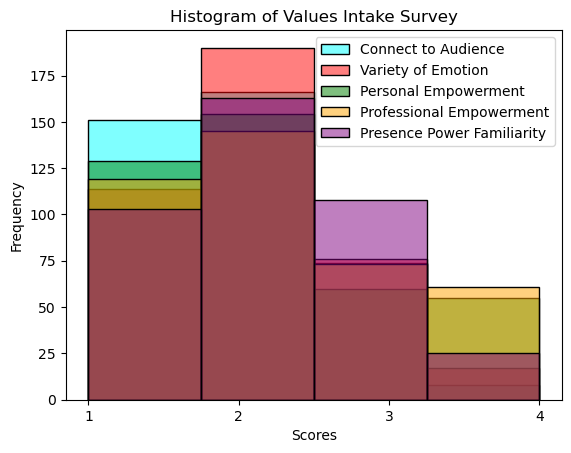

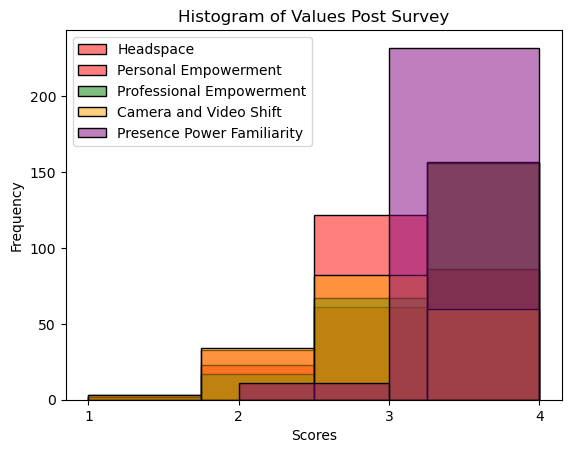

In [12]:
# Plot #1: Histogram of Intake and Post Scores

sns.histplot(data = df_intake["Connect to my audience when recording"], color="cyan", label="Connect to Audience", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_intake["Elicit a variety of emotions"], color="red", label="Variety of Emotion", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_intake["Empowers me personally"], color="green", label="Personal Empowerment", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_intake["Empowers me professionally"], color="orange", label="Professional Empowerment", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_intake["Familiar with power of presence"], color="purple", label="Presence Power Familiarity", alpha=0.5, binwidth=0.8, multiple="dodge")

plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Histogram of Values Intake Survey")
plt.xticks([1, 2, 3, 4]) 
plt.legend()
plt.show()

sns.histplot(data = df_post["Headspace"], color="red", label="Headspace", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_post["Personal Empowerment"], color="red", label="Personal Empowerment", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_post["Professional Empowerment"], color="green", label="Professional Empowerment", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_post["Video Shift"], color="orange", label="Camera and Video Shift", alpha=0.5, binwidth=0.8, multiple="dodge")
sns.histplot(data = df_post["Presence Power Familiarity"], color="purple", label="Presence Power Familiarity", alpha=0.5, binwidth=0.8, multiple="dodge")

plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Histogram of Values Post Survey")
plt.xticks([1, 2, 3, 4]) 
plt.legend()

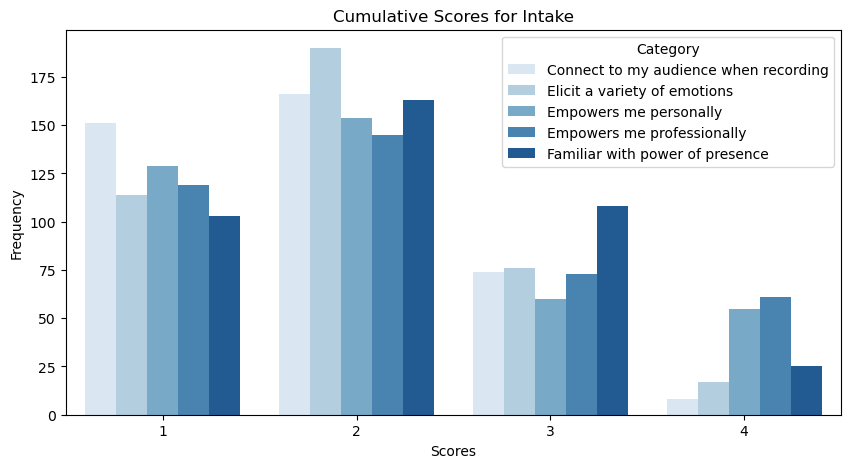

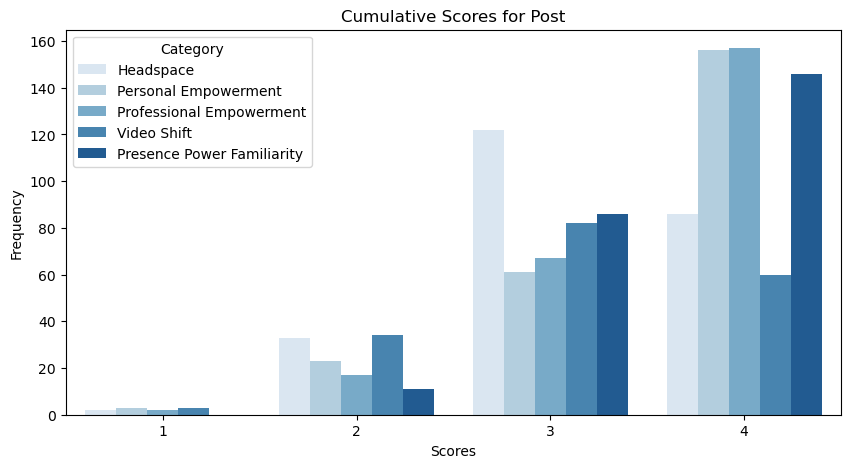

In [13]:
# Plot 2: Bar plot of Intake and Post scores
df_melted = df_intake.melt(value_vars=[
    "Connect to my audience when recording", 
    "Elicit a variety of emotions", 
    "Empowers me personally", 
    "Empowers me professionally", 
    "Familiar with power of presence"
], var_name="Category", value_name="Score")

# Plot the count of each score grouped by category
plt.figure(figsize=(10, 5))
sns.countplot(x="Score", hue="Category", data=df_melted, palette="Blues")

# Formatting
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Cumulative Scores for Intake")
plt.xticks([0, 1, 2, 3], ['1', '2', '3', '4'])
plt.legend(title="Category")

# Show plot
plt.show()

df_melted = df_post.melt(value_vars=[
    "Headspace", 
    "Personal Empowerment", 
    "Professional Empowerment", 
    "Video Shift", 
    "Presence Power Familiarity"
], var_name="Category", value_name="Score")

# Plot the count of each score grouped by category
plt.figure(figsize=(10, 5))
sns.countplot(x="Score", hue="Category", data=df_melted, palette="Blues")

# Formatting
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Cumulative Scores for Post")
plt.xticks([0, 1, 2, 3], ['1', '2', '3', '4'])
plt.legend(title="Category")

# Show plot
plt.show()

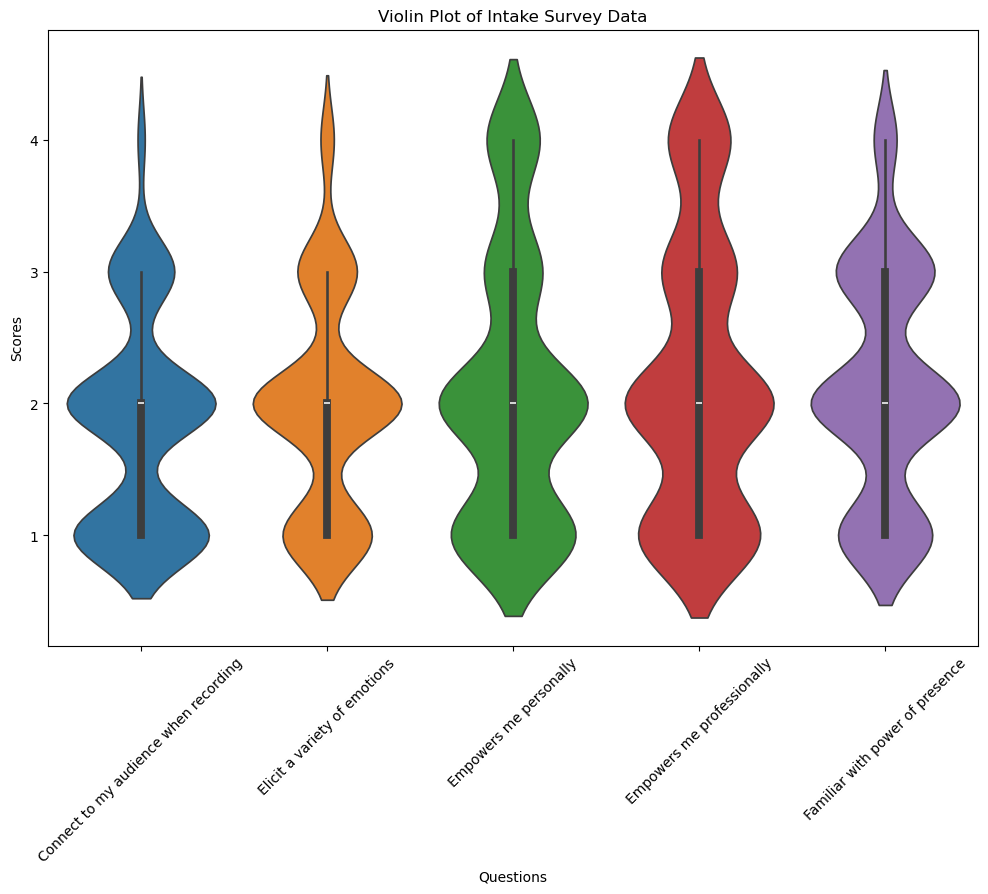

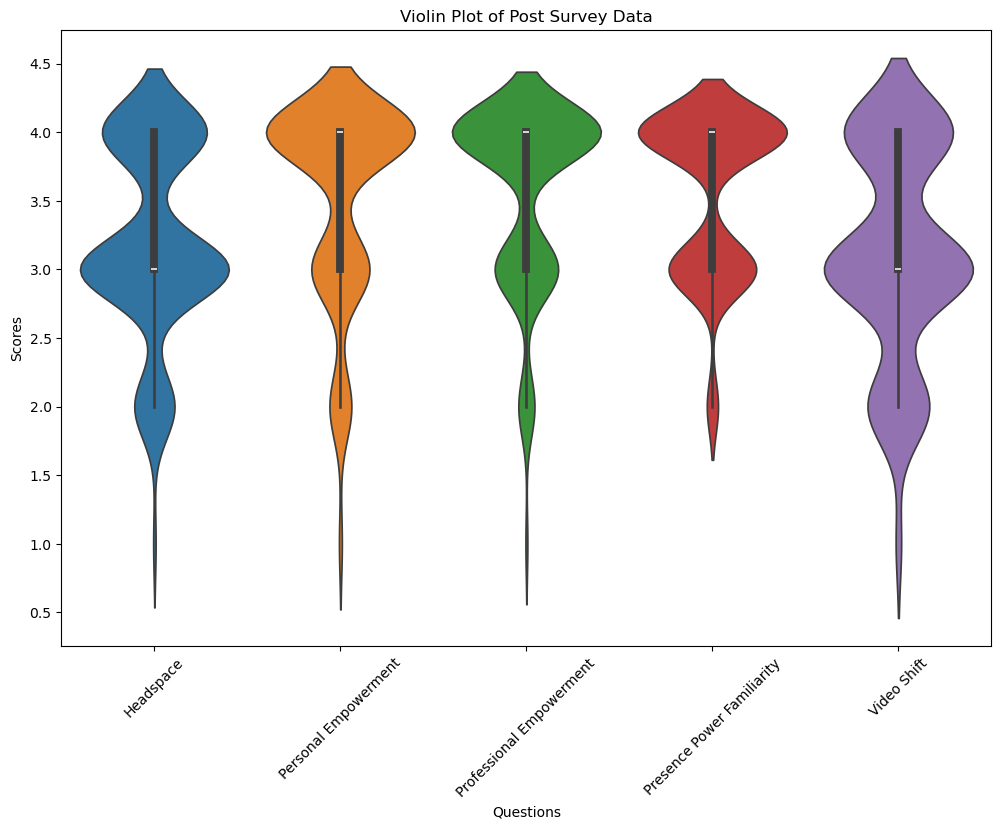

In [14]:
# Plot 3: Violin plot of Intake and Post scores
response_mapping = {
    "1 - Not so much.": 1,
    "2- Somewhat.": 2,
    "3 - Pretty familiar": 3,
    "4 - Absolutely!": 4
}

# Apply the mapping to the relevant columns
for column in df_intake.columns:
    df_intake[column] = df_intake[column].map(response_mapping).fillna(df_intake[column])

plt.figure(figsize=(12, 8))
sns.violinplot(data=df_intake)
plt.xlabel("Questions")
plt.ylabel("Scores")
plt.title("Violin Plot of Intake Survey Data")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Violin plot of total scores
response_mapping = {
    "1 - Not so much.": 1,
    "2- Somewhat.": 2,
    "3 - Pretty familiar": 3,
    "4 - Absolutely!": 4
}

# Apply the mapping to the relevant columns
for column in df_post.columns:
    df_post[column] = df_post[column].map(response_mapping).fillna(df_post[column])

plt.figure(figsize=(12, 8))
sns.violinplot(data=df_post)
plt.xlabel("Questions")
plt.ylabel("Scores")
plt.title("Violin Plot of Post Survey Data")
plt.xticks(rotation=45)
plt.show()

In [15]:
df_takes

,Activity,Assignment,Cohort,Prompt,Public View,Save Take,Submit Video,Take Label,Take Length,Task,...,User,Video URL,Creation Date,Modified Date,Slug,Creator,unique id,BigOutliers,overmean,abovemean
2964,2. Prompts,Your Baseline,DELD 2023,NaN,no,NaN,NaN,NaN,3.0,NaN,...,pbonzini@redhat.com,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:25 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223507194x385370423956602900,False,False,0
2965,2. Prompts,Your Baseline,DELD 2023,NaN,no,NaN,NaN,NaN,35.0,NaN,...,pbonzini@redhat.com,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:26 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223572571x108505123154558980,False,False,0
2966,2. Prompts,Your Baseline,DELD 2023,NaN,yes,yes,yes,"Take 2, because I clicked the wrong button on ...",40.0,NaN,...,pbonzini@redhat.com,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:27 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223660589x482522074475397100,False,False,0
2967,2. Prompts,Your Baseline,DELD 2023,NaN,no,NaN,NaN,NaN,28.0,NaN,...,pbonzini@redhat.com,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:29 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223746770x580339310978662400,False,False,0
2968,2. Prompts,Your Baseline,DELD 2023,NaN,yes,yes,yes,adventure,64.0,NaN,...,pbonzini@redhat.com,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:30 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223837318x582995495857946600,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13217,3. Your Story,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,124.0,NaN,...,frinaldi@cr.ibm.com,https://betteron-input.s3.amazonaws.com/0f0c79...,"Feb 14, 2025 9:34 am","Feb 14, 2025 9:37 am",NaN,frinaldi@cr.ibm.com,1739543647291x629984636954476500,False,True,1
13218,3. Your Story,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,125.0,NaN,...,frinaldi@cr.ibm.com,https://betteron-input.s3.amazonaws.com/1bdf6d...,"Feb 14, 2025 9:36 am","Feb 14, 2025 9:37 am",NaN,frinaldi@cr.ibm.com,1739543814055x322174307814866940,False,True,1
13220,4. Wildcard,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,91.0,NaN,...,frinaldi@cr.ibm.com,https://betteron-input.s3.amazonaws.com/be5444...,"Feb 14, 2025 9:40 am","Feb 14, 2025 9:40 am",NaN,frinaldi@cr.ibm.com,1739544014136x582067365340250100,False,True,1
13221,5. Reflection,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,89.0,NaN,...,frinaldi@cr.ibm.com,https://betteron-input.s3.amazonaws.com/20d2fa...,"Feb 14, 2025 9:45 am","Feb 14, 2025 9:45 am",NaN,frinaldi@cr.ibm.com,1739544324584x503823001099698200,False,True,1


In [41]:
df_takes.loc[df_takes['Assignment'] == 'Your Baseline', 'Activity'] = df_takes.loc[
    df_takes['Assignment'] == 'Your Baseline', 'Activity'
].replace({
    '1. Warm Ups': '1.1', 
    '2. Prompts': '1.2', 
    '3. Your Story': '1.3', 
    '4. Wildcard': '1.4',
    '5. Reflection': '1.5'
})

df_takes.loc[df_takes['Assignment'] == 'Audience Connection', 'Activity'] = df_takes.loc[
    df_takes['Assignment'] == 'Audience Connection', 'Activity'
].replace({
    '1. The Power of You': '2.1', 
    '2. Emotional & Tonal Range': '2.2', 
    '3. Wildcard': '2.3', 
    '4. Reflection': '2.4'
})

df_takes.loc[df_takes['Assignment'] == 'Keep Giving Those Gifts', 'Activity'] = df_takes.loc[
    df_takes['Assignment'] == 'Keep Giving Those Gifts', 'Activity'
].replace({
    '1. Giving Through The Camera': '3.1', 
    '2. Teamwork!': '3.2', 
    '3. Wildcard': '3.3', 
    '4. Reflection': '3.4'
})

df_takes.loc[df_takes['Assignment'] == 'The Moment Begins', 'Activity'] = df_takes.loc[
    df_takes['Assignment'] == 'The Moment Begins', 'Activity'
].replace({
    '1. Freestyle': '4.1', 
    '2. Your 2nd First Impression': '4.2', 
    '3. You\'re The Guide Now': '4.3', 
    '4. Wildcard': '4.4',
   '5. Final Reflection': '4.5'
})

In [66]:
filtered_df = df_takes[(df_takes['Activity'] == '1.2') | (df_takes['Activity'] == '1.3') | (df_takes['Activity'] == '1.4') | (df_takes['Activity'] == '1.5')
| (df_takes['Activity'] == '2.1') | (df_takes['Activity'] == '2.2') | (df_takes['Activity'] == '2.3') | (df_takes['Activity'] == '2.4')
| (df_takes['Activity'] == '3.1') | (df_takes['Activity'] == '3.2') | (df_takes['Activity'] == '3.3') | (df_takes['Activity'] == '3.4')
| (df_takes['Activity'] == '4.1') | (df_takes['Activity'] == '4.2') | (df_takes['Activity'] == '4.3') | (df_takes['Activity'] == '4.4')
| (df_takes['Activity'] == '4.5')]

In [120]:
filtered_df['average_take_length'] = filtered_df.groupby('Activity')['Take Length'].transform('mean')
filtered_df['avg_length_module'] = filtered_df.groupby('Assignment')['Take Length'].transform('mean')

overall_avg = filtered_df['Take Length'].mean()
print(overall_avg)

66.64288229081093


/var/folders/1w/hq9s5gxs7gs8czfbrbsb7nqc0000gn/T/ipykernel_24845/3480407388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['average_take_length'] = filtered_df.groupby('Activity')['Take Length'].transform('mean')
/var/folders/1w/hq9s5gxs7gs8czfbrbsb7nqc0000gn/T/ipykernel_24845/3480407388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['avg_length_module'] = filtered_df.groupby('Assignment')['Take Length'].transform('mean')


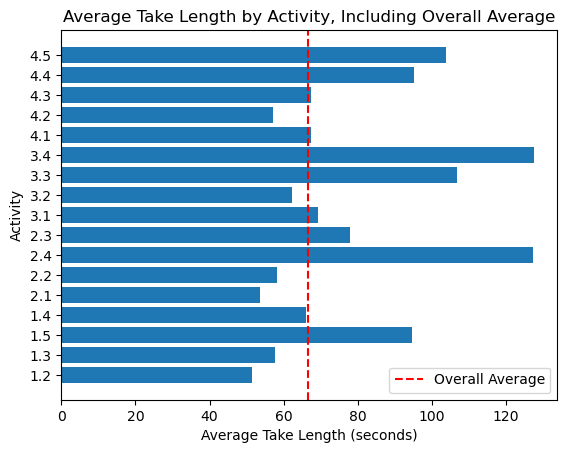

In [102]:
fig, ax = plt.subplots()

bars = ax.barh(filtered_df['Activity'], filtered_df['average_take_length'])
ax.axvline(overall_avg, color='red', linestyle='--')

# Adding labels and title
ax.set_xlabel('Average Take Length (seconds)')
ax.set_ylabel('Activity')
ax.set_title('Average Take Length by Activity, Including Overall Average')

# Adding legend for overall average line
plt.legend(['Overall Average'], loc='lower right')

plt.show()

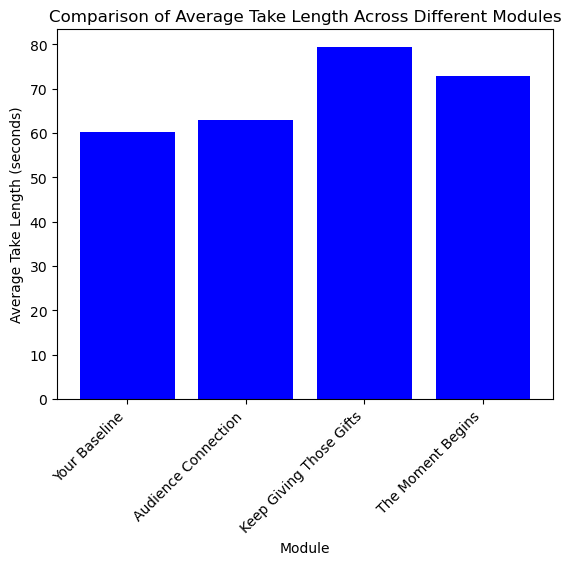

In [143]:


fig, ax = plt.subplots()


ax.bar(filtered_df['Assignment'], filtered_df['avg_length_module'], color='blue', label='Average Take Length')


ax.set_xlabel('Module')
ax.set_ylabel('Average Take Length (seconds)')
ax.set_title('Comparison of Average Take Length Across Different Modules')

plt.xticks(rotation=45, ha='right')

plt.show()

,Activity,Assignment,Cohort,Prompt,Public View,Save Take,Submit Video,Take Label,Take Length,Task,...,Video URL,Creation Date,Modified Date,Slug,Creator,unique id,BigOutliers,overmean,abovemean,average_take_length
2964,1.2,Your Baseline,DELD 2023,NaN,no,NaN,NaN,NaN,3.0,NaN,...,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:25 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223507194x385370423956602900,False,False,0,51.437799
2965,1.2,Your Baseline,DELD 2023,NaN,no,NaN,NaN,NaN,35.0,NaN,...,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:26 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223572571x108505123154558980,False,False,0,51.437799
2966,1.2,Your Baseline,DELD 2023,NaN,yes,yes,yes,"Take 2, because I clicked the wrong button on ...",40.0,NaN,...,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:27 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223660589x482522074475397100,False,False,0,51.437799
2967,1.2,Your Baseline,DELD 2023,NaN,no,NaN,NaN,NaN,28.0,NaN,...,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:29 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223746770x580339310978662400,False,False,0,51.437799
2968,1.2,Your Baseline,DELD 2023,NaN,yes,yes,yes,adventure,64.0,NaN,...,//758593e31f0ff7a8eaea331049e87337.cdn.bubble....,"Sep 20, 2023 11:30 am","May 1, 2024 2:07 pm",NaN,pbonzini@redhat.com,1695223837318x582995495857946600,False,True,0,51.437799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13217,1.3,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,124.0,NaN,...,https://betteron-input.s3.amazonaws.com/0f0c79...,"Feb 14, 2025 9:34 am","Feb 14, 2025 9:37 am",NaN,frinaldi@cr.ibm.com,1739543647291x629984636954476500,False,True,1,57.646154
13218,1.3,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,125.0,NaN,...,https://betteron-input.s3.amazonaws.com/1bdf6d...,"Feb 14, 2025 9:36 am","Feb 14, 2025 9:37 am",NaN,frinaldi@cr.ibm.com,1739543814055x322174307814866940,False,True,1,57.646154
13220,1.4,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,91.0,NaN,...,https://betteron-input.s3.amazonaws.com/be5444...,"Feb 14, 2025 9:40 am","Feb 14, 2025 9:40 am",NaN,frinaldi@cr.ibm.com,1739544014136x582067365340250100,False,True,1,66.051429
13221,1.5,Your Baseline,Executive Presence Studio - Feb '25,NaN,no,yes,yes,NaN,89.0,NaN,...,https://betteron-input.s3.amazonaws.com/20d2fa...,"Feb 14, 2025 9:45 am","Feb 14, 2025 9:45 am",NaN,frinaldi@cr.ibm.com,1739544324584x503823001099698200,False,True,1,94.556738


In [112]:
filtered_df['average_take_length'].unique()

array([ 51.43779904,  57.64615385,  94.55673759,  66.05142857,
        53.58715596,  58.26386037, 127.42231076,  77.99456522,
        69.3005848 ,  62.24242424, 106.73873874, 127.54954955,
        67.51918159,  57.23880597,  67.39613527,  95.11965812,
       103.73359073])

In [118]:
filtered_df['Assignment'].unique()

array(['Your Baseline', 'Audience Connection', 'Keep Giving Those Gifts',
       'The Moment Begins'], dtype=object)

In [122]:
filtered_df['avg_length_module'].unique()

array([60.16290444, 62.98364566, 79.3952862 , 72.8981289 ])